# Importacoes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings
warnings.filterwarnings('ignore')

# Instanciar os dados

In [5]:
df = pd.read_csv('usedcars.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Visualizar apenas variaveis numericas

In [6]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Funcoes de plotagem

In [7]:
def DistPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color='r', label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color='b', label=BlueName)
    
    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of cars")
    plt.show()
    plt.close()

In [8]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    xmax = max([x_train.values.max(), x_test.values.max()])
    xmin = min([x_train.values.min(), x_test.values.min()])
    
    x = np.arange(xmin, xmax, 0.01)
    
    plt.plot(x_train, y_train, 'ro', label="Training Data")
    plt.plot(x_test, y_test, 'go', label="Test Data")
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label="Predicted Function")
    plt.ylim([-10000, 60000])
    plt.ylabel("Price")
    plt.legend()

# Treino e Teste

In [11]:
# Variavel alvo
y_data = df['price']

# Variaveis preditoras
x_data = df.drop('price', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=42)

print("Test samples =", x_test.shape[0])
print("Train samples =", x_train.shape[0])

Test samples = 21
Train samples = 180


# Questao 01
Usar a funcao "train_test_split" para dividir o conjunto de dados de forma que 40% fique para teste. Definir o "random_state" igual a 0. A saída da função deve ser a seguinte: "x_train1", "x_test1", "y_train1" e "y_test1".

In [20]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


## Importar a regressao linear

In [14]:
from sklearn.linear_model import LinearRegression

## Instanciar a regressao linear

In [15]:
lr = LinearRegression()

## Ajustar a regressao linear usando a caracteristica "horsepower"

In [16]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

## Calcular o R2

In [17]:
lr.score(x_test[['horsepower']], y_test)

0.6572835188314445

## Verificar o R2 nos dados de treino

In [18]:
lr.score(x_train[['horsepower']], y_train)

0.6385840105530061

# Questao 02
Encontrar o R2 nos dados de teste usando 40% dos dados para teste.

In [21]:
lr.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [22]:
lr.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [23]:
lr.score(x_train1[['horsepower']], y_train1)

0.5754067463583004

# Verificacao do score usando validacao cruzada

In [24]:
from sklearn.model_selection import cross_val_score

Para a cross_val, informamos a variavel onde o modelo foi instanciado, as variaveis preditoras, e a variavel target e, em seguida, a quantidade de folds que desejamos.

In [32]:
cross_val = cross_val_score(lr, x_data[['horsepower']], y_data, cv=5)

O score padrao eh o R2. Cada elemento no array possui o R2 medio para a pasta.

In [33]:
cross_val

array([ 0.73769851,  0.55987071, -0.08045406,  0.87716741, -0.16234087])

Podemos calcular a media e o desvio padrao dessa validacao cruzada.

In [34]:
print("Media:", cross_val.mean(), "; Desvio padrao:", cross_val.std())

Media: 0.3863883411872557 ; Desvio padrao: 0.42741657314064646


# Questao 03
Calcular o R2 medio usando dois folds e, em seguida, encontrar o R2 medio para o segundo fold usando "horsepower". 

In [31]:
cross_val2 = cross_val_score(lr, x_data[['horsepower']], y_data, cv=2)
cross_val2.mean()

0.5166761697127429

Podemos usar a funcao "cross_val_predict" para obter a previsao da saida. 

In [30]:
from sklearn.model_selection import cross_val_predict

In [35]:
yhat = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)
yhat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection

In [36]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Predicao usando os dados de treino

In [37]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([27184.98126069,  6079.97788456,  6571.55260171, 23634.90728233,
       10399.3567925 ])

Predicao usando os dados de teste

In [38]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 6742.43726315, 26620.30861722,  5835.9977778 ,  7454.44829397,
       13402.42315763])

Vamos avaliar o modelo usando os dados de treino e teste separadamente.

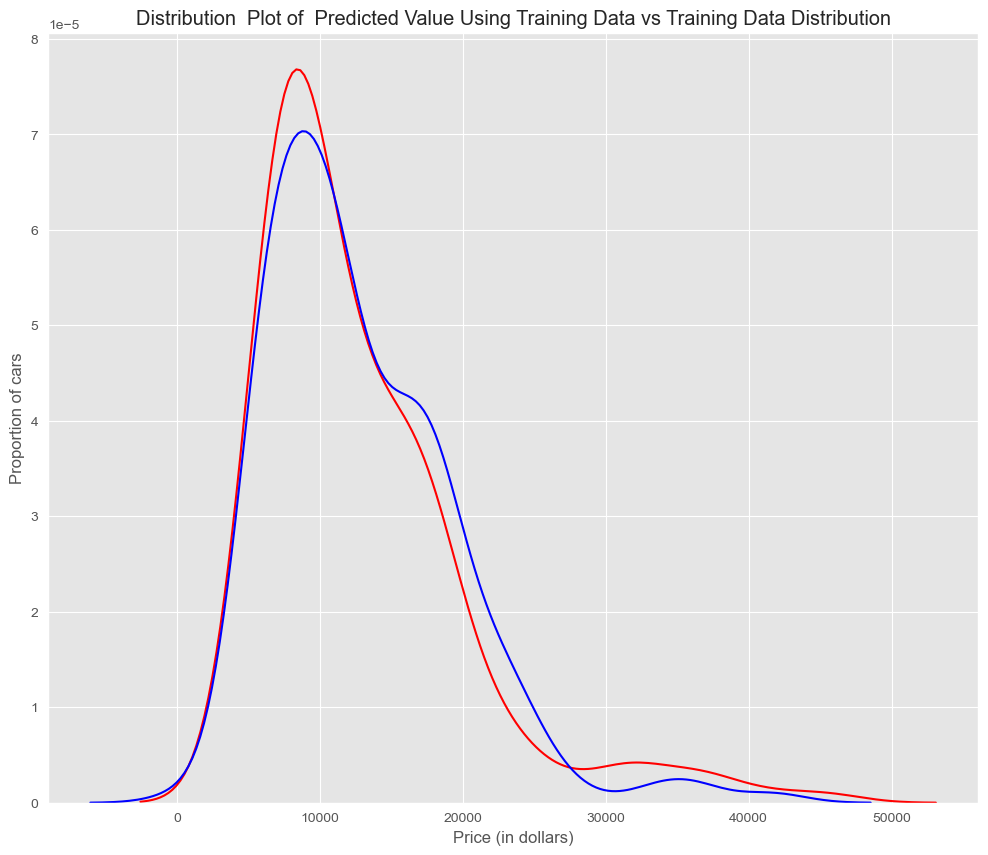

In [39]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Aparentemente, o modelo esta indo bem nos dados de treino. Mas agora precisamos testar o desempenho deste modelo em dados que ele ainda nao viu.

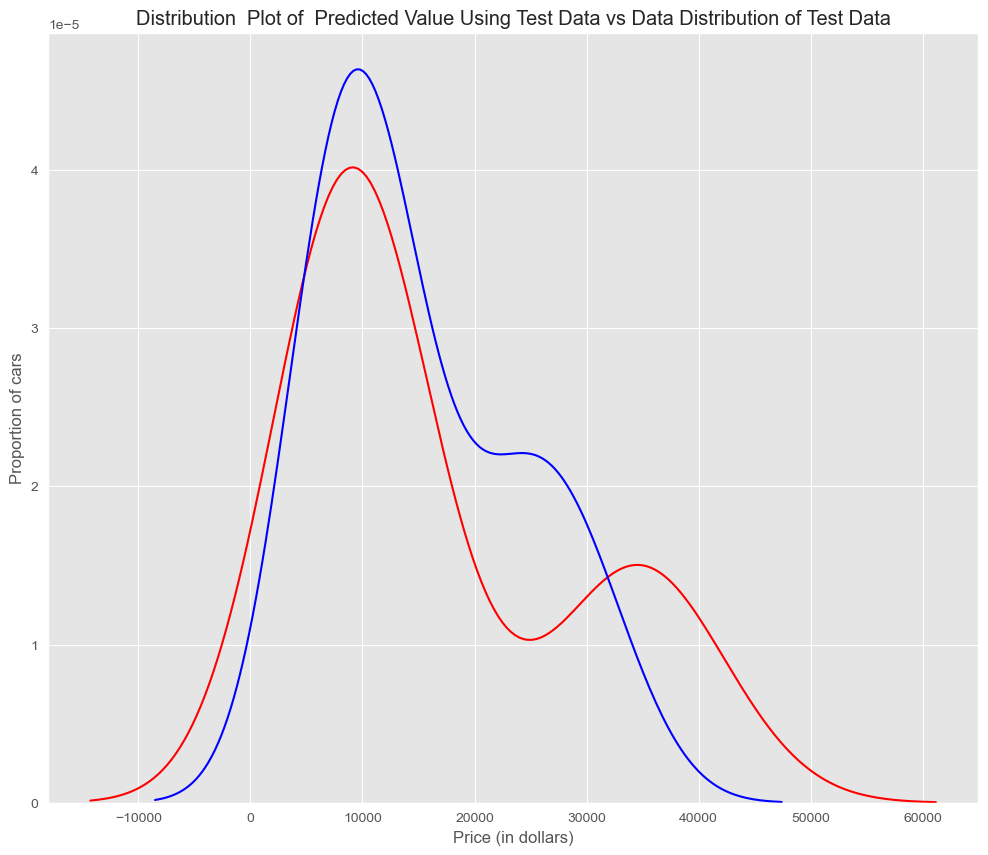

In [40]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

# Overfitting

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [43]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [45]:
# Criar a regressao linear
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [46]:
yhat = poly.predict(x_test_pr)
yhat[:5]

array([ 6728.58615619,  7307.91973653, 12213.73734432, 18893.37966315,
       19996.10669225])

In [47]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.58615619  7307.91973653 12213.73734432 18893.37966315]
True values: [ 6295. 10698. 13860. 13499.]


Visualizar os dados de treino, teste, e a funcao de predicao

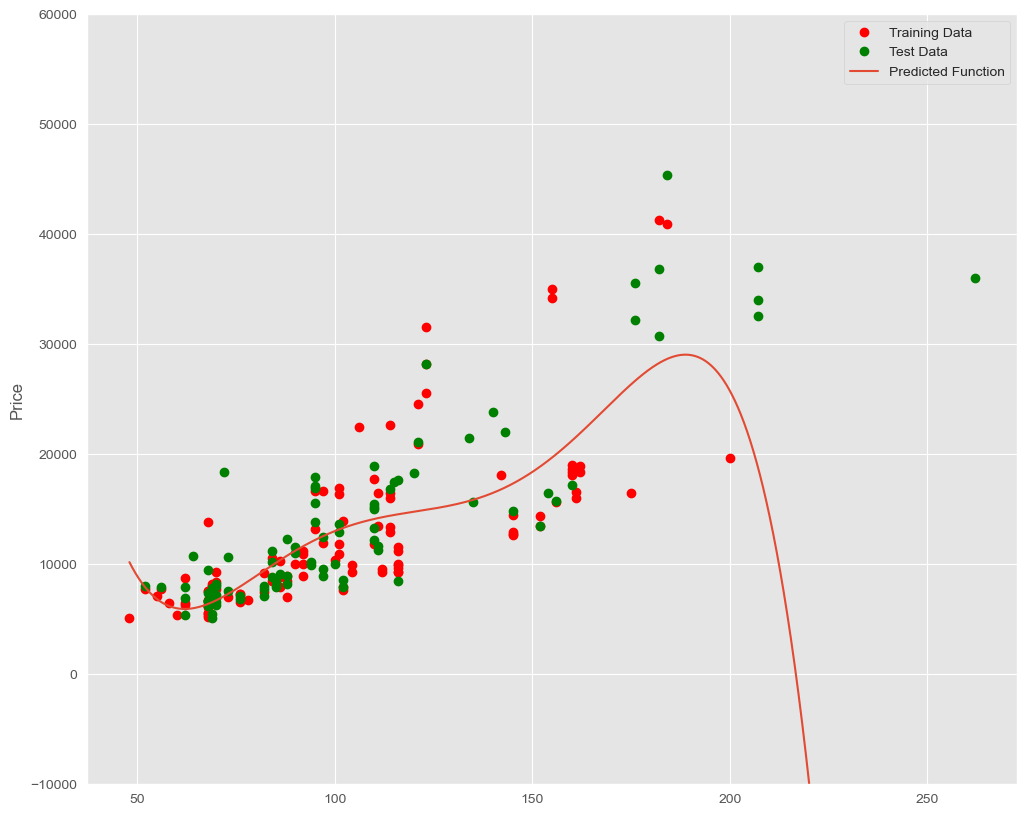

In [48]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

R2 dos dados de treino

In [49]:
poly.score(x_train_pr, y_train)

0.5567716897727109

R2 nos dados de teste

In [51]:
poly.score(x_test_pr, y_test)

-29.870994900857237

Podemos ver que o valor do R2 nos dados de treino esta em torno de 55 porem, nos dados de teste temos um resultado negativo (o que eh pessimo). Quanto menor for o R2, pior o modelo eh. Um R2 __negativo__ eh um sinal de __overfitting__.

Text(3, 0.75, 'Maximum R^2 ')

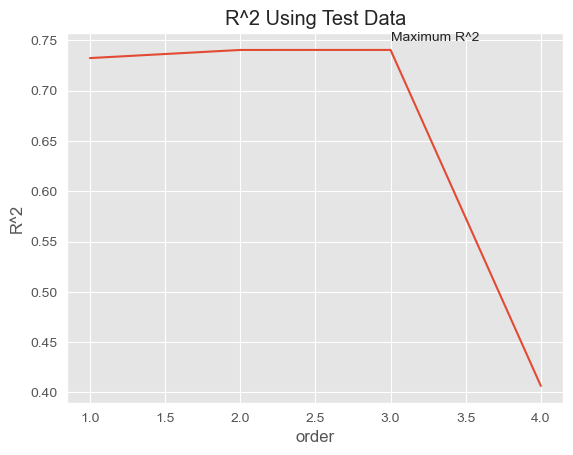

In [52]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [53]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [54]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

# Questao 04
Criar um PolynomialFeature com grau 2

In [55]:
pr1 = PolynomialFeatures(degree=2)

# Questao 05
Transformar os dados de treino e teste para as variaveis 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.

In [56]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

# Questao 06
Quantas dimensoes as novas caracteristicas possuem?

In [57]:
x_train_pr1.shape

(110, 15)

# Questao 07
Criar um modelo de regressao linear. Treinar o modelo com o fit usando as caracteristicas polinomiais.

In [58]:
poly1 = LinearRegression().fit(x_train_pr1, y_train)

# Questao 08
Usar o metodo predict para prever um output. Usar a funcao DistPlot para exibir a distribuicao de previstos vs atuais

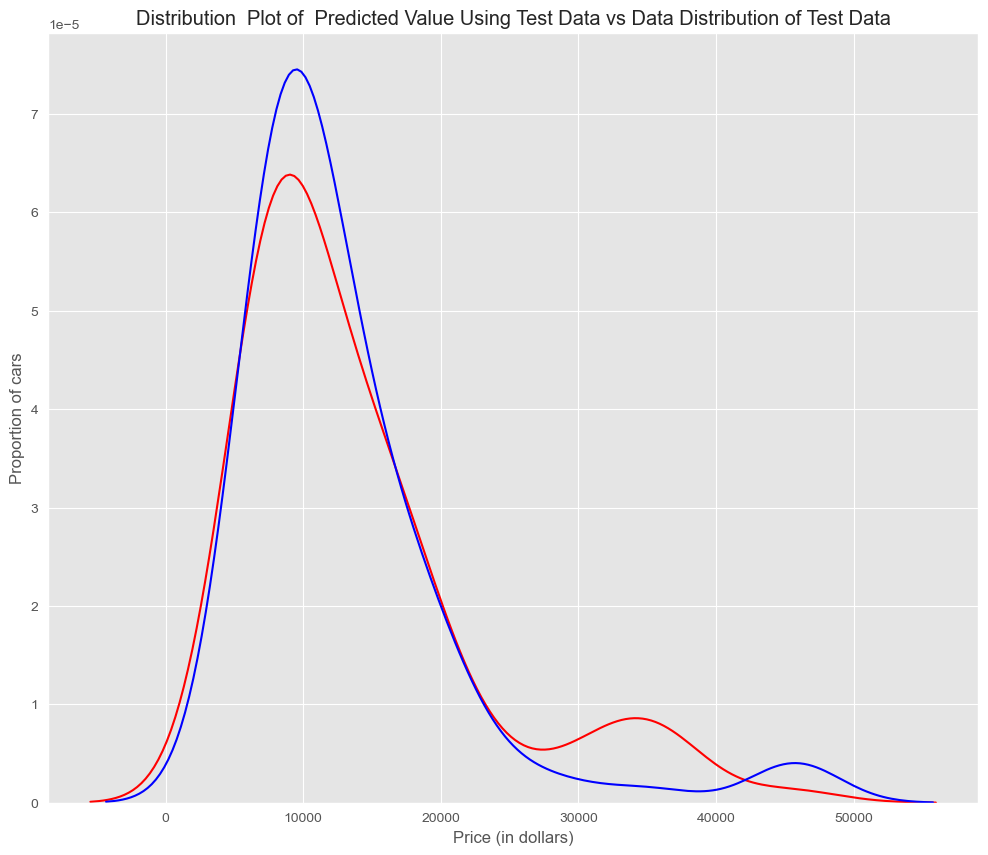

In [59]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)